# Exercise 3: Using types - a simple N-body in 80 lines

Julia makes it easy to write your own types, which are similar to structs in C-family languages. Multiple dispatch adds a powerful way to handle tasks like default values or different behaviours really easily.

Here we'll look at how you could construct a simple N-body code.

Tasks:
* define an abstract type representing the bodies in the simulation
* define subtypes of this representing two different kinds of bodies in 2D: a moving body and a fixed body
* define a type which holds all the bodies in the simulation
* make a few of these bodies in various positions to start
* write a movement function to move the bodies as necessary
* write a force function to give an inverse square law force between bodies
* write an acceleration function to apply gravity to the bodies
* write a step function to bring it all together (acceleration and movement)

Extras:
* write plot functions for individual points and for the whole system
* plot it and watch the carnage

## Define an abstract type representing the bodies in the simulation

In [1]:
abstract Body

## Define subtypes of this representing moving and fixed bodies in 2D

In [2]:
type MovingBody <: Body
    x::Float64
    y::Float64
    dx::Float64
    dy::Float64
end
MovingBody(x, y) = MovingBody(x, y, 0, 0)

type FixedBody <: Body
    x::Float64
    y::Float64
end

## Define a type which holds all the bodies in the simulation

In [3]:
type System
    bodies::Vector{Body}
end

## Make a few of these in various positions to start

In [4]:
function setup()
    p1 = FixedBody(0,0)
    p2 = MovingBody(1,0)
    p3 = MovingBody(1,1,1,1)
    p4 = MovingBody(0,1,1,-1)
    bodies = [p1, p2, p3, p4]
    
    System(bodies)
end

sys = setup()

System(Body[FixedBody(0.0,0.0),MovingBody(1.0,0.0,0.0,0.0),MovingBody(1.0,1.0,1.0,1.0),MovingBody(0.0,1.0,1.0,-1.0)])

## Write a movement function to move the bodies as necessary

In [5]:
const dt = 0.1  # declare it as const because it's not in a function

function move!(b::MovingBody)
    b.x += b.dx * dt
    b.y += b.dy * dt
    
    b
end

move!(b::FixedBody) = b

move! (generic function with 2 methods)

## Write a force function to give an inverse square law force between bodies

In [6]:
function force(b1::Body, b2::Body)
    dx = b2.x - b1.x
    dy = b2.y - b1.y
    d² = dx^2 + dy^2 + 1e-9  # we add a 1e-9 softening term to avoid dividing by zero
    inv_d² = 1 / d²
    Fx = dx * inv_d²
    Fy = dy * inv_d²
    
    Fx, Fy
end

force (generic function with 1 method)

## Write an acceleration function to apply gravity to the bodies

In [7]:
function accelerate!(sys::System, b::MovingBody)
    d2x = 0.0
    d2y = 0.0
    for other in sys.bodies
        if b !== other
            Fx, Fy = force(b, other)
            d2x += Fx
            d2y += Fy
        end
    end
    b.dx += d2x * dt
    b.dy += d2y * dt
    
    b
end

accelerate!(sys::System, b::FixedBody) = b

accelerate! (generic function with 2 methods)

## Write a step function to bring it all together

In [8]:
function step!(sys::System, b::Body)
    accelerate!(sys, b)
    move!(b)
end

function step!(sys::System)
    for b in sys.bodies
        step!(sys, b)
    end
end

step! (generic function with 2 methods)

## Extra: plot functions to plot individual points and the system

In [9]:
using PyPlot

function plot(b::FixedBody)
    scatter(b.x, b.y, s=50, color="Red")
end

function plot(b::MovingBody)
    scatter(b.x, b.y, s=50, color="Black")
    arrow(b.x, b.y, b.dx * dt/2, b.dy * dt/2)
end

function plot(s::System)
    for b in s.bodies
        plot(b)
    end
    axis("equal")
end

INFO: Loading help data...


plot (generic function with 3 methods)

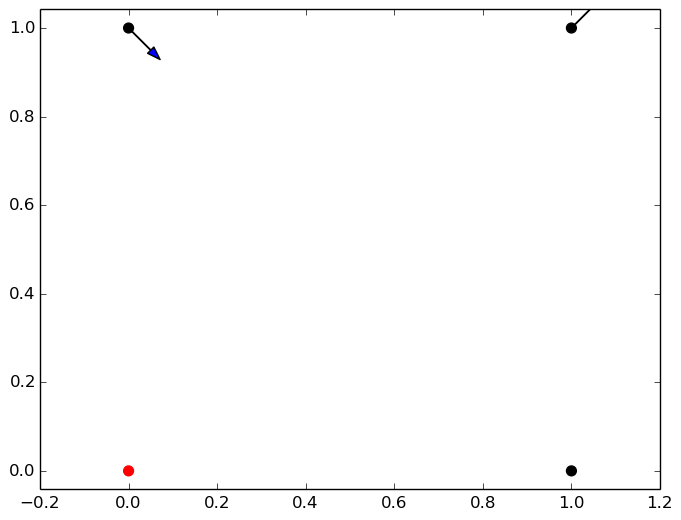

(-0.2,1.2000000000000002,-0.2,1.2000000000000002)

In [11]:
sys = setup()
plot(sys)

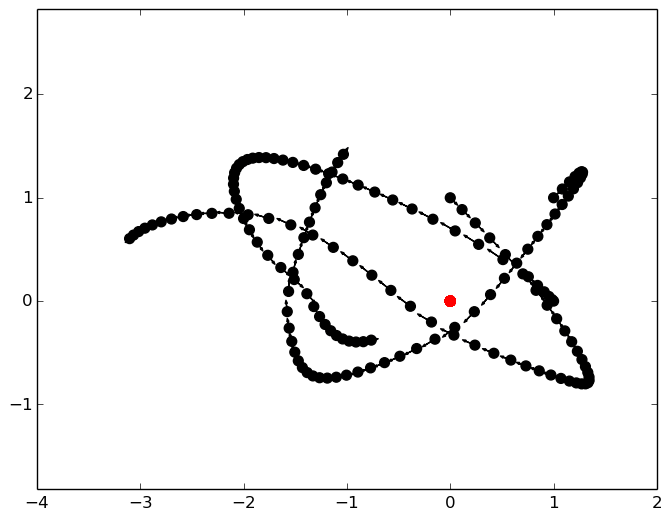

In [12]:
for t = 0:dt:5
    plot(sys)
    step!(sys)
end